# Data Modeling

This notebook carries out basic data modeling of the [Dataset of songs in Spotify](https://www.kaggle.com/datasets/mrmorj/dataset-of-songs-in-spotify); then, this data modeling is trasferred to production-level code in the components placed in the uper level of this folder.

Note that the present notebook is not tracked with Weights and Biases. To see how to track notebooks, have a look at [`EDA_Tracked.ipynb`](EDA_Tracked.ipynb).

Overview of contents:

1. [Basic EDA](#1.-basic-eda)
2. [Preprocessing: Basic Cleaning and Feature Engineering](#2.-Preprocessing:-Basic-Cleaning-and-Feature Engineering)
3. C

## 1. Basic EDA

In [1]:
import sys
import itertools

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_parquet('../dataset/genres_mod.parquet')

In [4]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,genre,song_name,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,124539,4,Dark Trap,Mercury: Retrograde,None
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,224427,4,Dark Trap,Pathology,None
2,0.850,0.893,5,NaN,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,98821,4,Dark Trap,Symbiote,None
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,audio_features,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),None
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,audio_features,123298,4,Dark Trap,Venom,None


In [5]:
# Missing values in
# - loudness
# - song_name
# - title (album?)
df.info()s

SyntaxError: invalid syntax (4068863288.py, line 5)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,42896.0,0.639336,0.156585,0.065100,0.52400,0.64600,0.7660,0.988
energy,42896.0,0.762560,0.183691,0.000243,0.63200,0.80300,0.9230,1.000
key,42896.0,5.368566,3.664993,0.000000,1.00000,6.00000,9.0000,11.000
loudness,33726.0,-6.463899,2.938171,-32.929000,-8.16500,-6.22850,-4.5200,3.148
mode,42896.0,0.549492,0.497550,0.000000,0.00000,1.00000,1.0000,1.000
speechiness,42896.0,0.136446,0.125976,0.022700,0.04910,0.07540,0.1930,0.946
acousticness,42896.0,0.096260,0.170843,0.000001,0.00173,0.01640,0.1070,0.988
instrumentalness,42896.0,0.283229,0.370810,0.000000,0.00000,0.00596,0.7220,0.989
liveness,42896.0,0.214080,0.175463,0.010700,0.09960,0.13500,0.2940,0.988
valence,42896.0,0.357170,0.233255,0.018700,0.16100,0.32200,0.5220,0.988


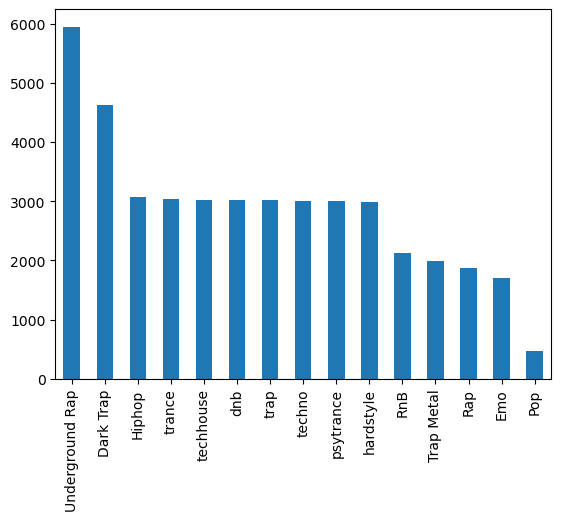

In [7]:
df['genre'].value_counts().plot(kind='bar')

In [8]:
df['song_name']

0                                  Mercury: Retrograde
1                                            Pathology
2                                             Symbiote
3        ProductOfDrugs (Prod. The Virus and Antidote)
4                                                Venom
                             ...                      
42891                                       Bang Bros!
42892                                             None
42893                                             None
42894                               Southern Hostility
42895                                             None
Name: song_name, Length: 42896, dtype: object

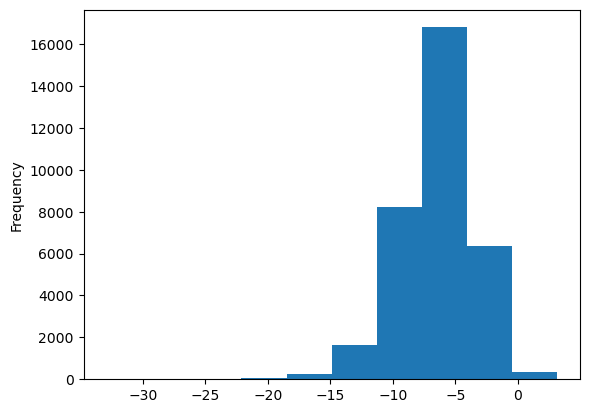

In [9]:
df['loudness'].plot(kind='hist')

In [10]:
df['time_signature'].value_counts()

4    40999
3     1227
5      519
1      151
Name: time_signature, dtype: int64

In [11]:
df['key'].value_counts()

1     7641
7     4332
11    4197
6     3767
0     3520
8     3405
10    3294
9     3293
2     3093
5     3047
4     2397
3      910
Name: key, dtype: int64

## 2. Preprocessing: Basic Cleaning and Feature Engineering

This basic preprocessing should not include anything sophisticated nor anything that should be applied to new incoming datapoints; those transformations should go into the processing part of the inference pipeline.

In [12]:
# Remove duplicates
df = df.drop_duplicates().reset_index(drop=True)

In [13]:
# A minimal feature engineering step: a new feature = song name + title
df['title'].fillna(value='', inplace=True)
df['song_name'].fillna(value='', inplace=True)
df['text_feature'] = df['title'] + ' ' + df['song_name']

## 3. Check Data

In [14]:
# Get all possible genres
df['genre'].unique()

array(['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB',
       'Pop', 'Hiphop', 'techhouse', 'techno', 'trance', 'psytrance',
       'trap', 'dnb', 'hardstyle'], dtype=object)

In [15]:
# Get all column types
for col in df.columns:
    print(f"{col}: {df[col].dtype}")

danceability: float64
energy: float64
key: int64
loudness: float64
mode: int64
speechiness: float64
acousticness: float64
instrumentalness: float64
liveness: float64
valence: float64
tempo: float64
type: object
duration_ms: int64
time_signature: int64
genre: object
song_name: object
title: object
text_feature: object


In [16]:
# Get min-max ranges of numerical columns
df.describe().T[['min', 'max']]

,min,max
danceability,0.065100,0.988
energy,0.000243,1.000
key,0.000000,11.000
loudness,-32.929000,3.148
mode,0.000000,1.000
speechiness,0.022700,0.946
acousticness,0.000001,0.988
instrumentalness,0.000000,0.989
liveness,0.010700,0.988
valence,0.018700,0.988


In [17]:
columns = [
    "danceability",
    "energy",
    "loudness",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "duration_ms"
]

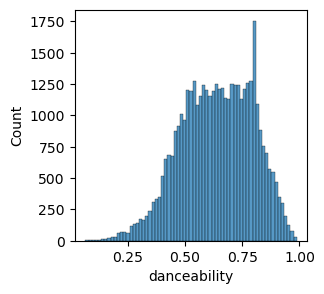

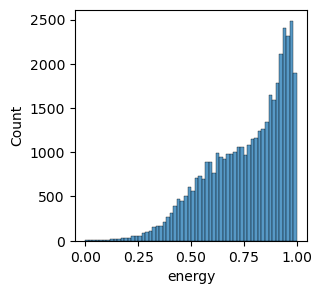

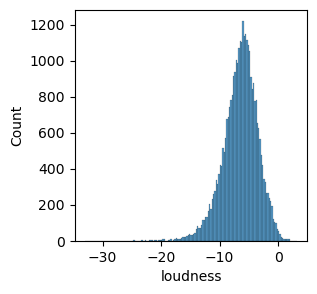

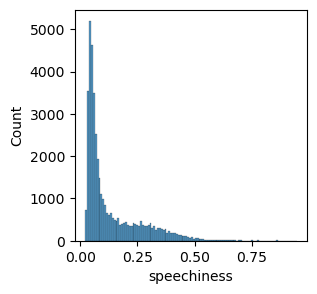

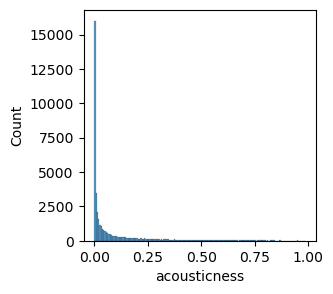

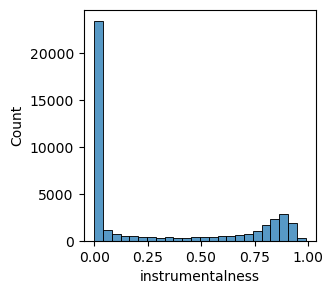

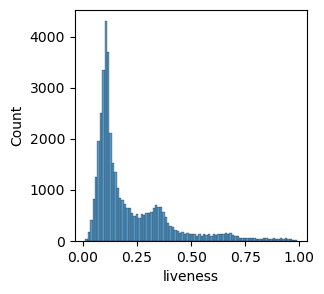

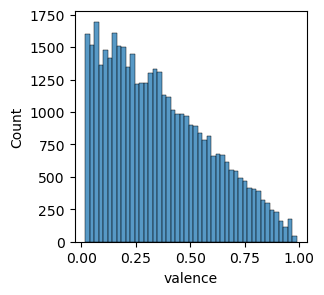

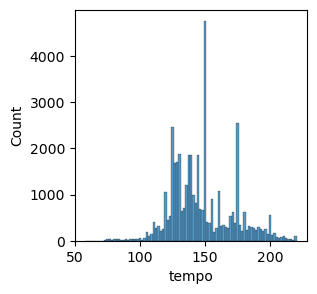

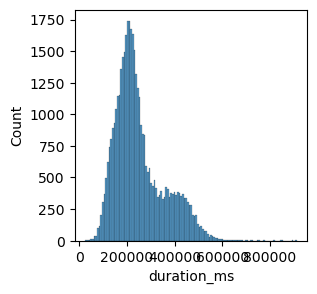

In [18]:
# Plot histograms of selected numerical columns
for col in columns:
    plt.figure(figsize=(3,3))
    sns.histplot(df[col])

## 4. Segregate Data

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Note that the complete df is split, without differentiating X & y
df_train, df_test = train_test_split(
    df,
    test_size=0.3,
    random_state=42,
    stratify=df['genre']
)

## 5. Inference Pipeline: Processing + Model

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, FunctionTransformer, LabelEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

# Add root path so that utilities package is found (for custom transformations)
sys.path.insert(1, '..')
from util_lib import ModeImputer

In [22]:
# Get X & y
X = df_train.copy()
y = X.pop("genre")

In [23]:
# Split: Train / Validation
# I can further split X & y here,
# but instead I will perform K-fold cross validation with grid search
#X_train, X_val, y_train, y_val = train_test_split(
#    X,
#    y,
#    test_size=0.3, # validation
#    stratify=df_train['genre'],
#    random_state=42
#)
le = LabelEncoder()
y = le.fit_transform(y)

In [24]:
# Define treated columns
numeric_features = sorted([
    "danceability",
    "energy",
    "loudness",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "duration_ms"
])

categorical_features = sorted([
    "time_signature",
    "key"
])

nlp_features = sorted([
    "text_feature"
])

In [25]:
# Define processing for categorical columns
# Note that I use a custom transformation as an example
categorical_transformer = make_pipeline(
    #SimpleImputer(strategy="constant", fill_value=0), OrdinalEncoder()
    ModeImputer(variables=categorical_features), OrdinalEncoder(handle_unknown='ignore')
)

In [26]:
# Define processing for numerical columns
numeric_transformer = make_pipeline(
    SimpleImputer(strategy="median"), StandardScaler()
)

In [27]:
# Define processing of NLP/text columns
# This trick is needed because SimpleImputer wants a 2d input, but
# TfidfVectorizer wants a 1d input. So we reshape in between the two steps
reshape_to_1d = FunctionTransformer(np.reshape, kw_args={"newshape": -1})
nlp_transformer = make_pipeline(
    SimpleImputer(strategy="constant", fill_value=""),
    reshape_to_1d,
    TfidfVectorizer(
        binary=True,
        max_features=10
    )
)

In [28]:
# Put the 3 tracks together into one pipeline using the ColumnTransformer
# This also drops the columns that we are not explicitly transforming
processor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
        ("nlp1", nlp_transformer, nlp_features),
    ],
    remainder="drop",  # This drops the columns that we do not transform
)

In [29]:
# Get a list of the columns we used
used_columns = list(itertools.chain.from_iterable([x[2] for x in processor.transformers]))

In [30]:
print(used_columns)

['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'key', 'time_signature', 'text_feature']


In [31]:
# We are about to the define our clissifier: a random forest
# We should have complete control of its parameters
# which will be also modified in a grid search.
# This dictionary is encoded as a YAML later on in the main config.yaml
random_forest_config = {
    'n_estimators': 100,
    'criterion': 'gini',
    'max_depth': 13,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'min_weight_fraction_leaf': 0.0,
    'max_features': 'auto',
    'max_leaf_nodes': None,
    'min_impurity_decrease': 0.0,
    'min_impurity_split': None,
    'bootstrap': True,
    'oob_score': False,
    'n_jobs': None,
    'random_state': 42,
    'verbose': 0,
    'warm_start': False,
    'class_weight': "balanced",
    'ccp_alpha': 0.0,
    'max_samples': None
}

In [32]:
# Append classifier to processing pipeline.
# Now we have a full prediction pipeline.
# Pipeline needs to be used here.
# The result is a pipeline with two high-level elements: processor and classifier.
# Note that we pass the configuration dictionary to the model;
# however, this should be modified in the grid search.
pipe = Pipeline(
    steps=[
        ("processor", processor),
        ("classifier", RandomForestClassifier(random_forest_config)),
    ]
)

In [34]:
# Define Grid Search: parameters to try, cross-validation size
param_grid = {
    'classifier__n_estimators': [100, 150, 200],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None]+[n for n in range(5,20,5)]
}
# Grid search
search = GridSearchCV(estimator=pipe,
                      param_grid=param_grid,
                      cv=3,
                      scoring='roc_auc_ovr') # ovr = one versus rest, to make roc_auc work with multi-class
# Find best hyperparameters and best estimator pipeline
search.fit(X[used_columns], y)
# We would export this model
rfc_pipe = search.best_estimator_

In [35]:
# This is the best score
print(search.best_score_)
# We can export the best parameters to a YAML and load them for inference
print(search.best_params_)

0.9574610549572964
{'classifier__criterion': 'gini', 'classifier__max_depth': 15, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 200}


## 6. Evaluation

In [36]:
# Get features/columns that have been used for creating the pipeline
used_columns = list(itertools.chain.from_iterable([x[2] for x in rfc_pipe['processor'].transformers]))

In [44]:
X_test = df_test.copy()
y_test = X_test.pop('genre')
y_test = le.transform(y_test)

In [45]:
# Predict ONLY with allowed columns/features
pred_proba = rfc_pipe.predict_proba(X_test[used_columns])

In [49]:
# Evaluation: ROC-AUC
score = roc_auc_score(y_test, pred_proba, average="macro", multi_class="ovo")
print(score)

0.9530777842007662


In [54]:
le.classes_

array(['Dark Trap', 'Emo', 'Hiphop', 'Pop', 'Rap', 'RnB', 'Trap Metal',
       'Underground Rap', 'dnb', 'hardstyle', 'psytrance', 'techhouse',
       'techno', 'trance', 'trap'], dtype=object)

In [56]:
# Check that the label class list is aligned with the series 0, 1, 2, ...
le.transform(['Dark Trap', 'Hiphop', 'Trap Metal'])

array([0, 2, 6])

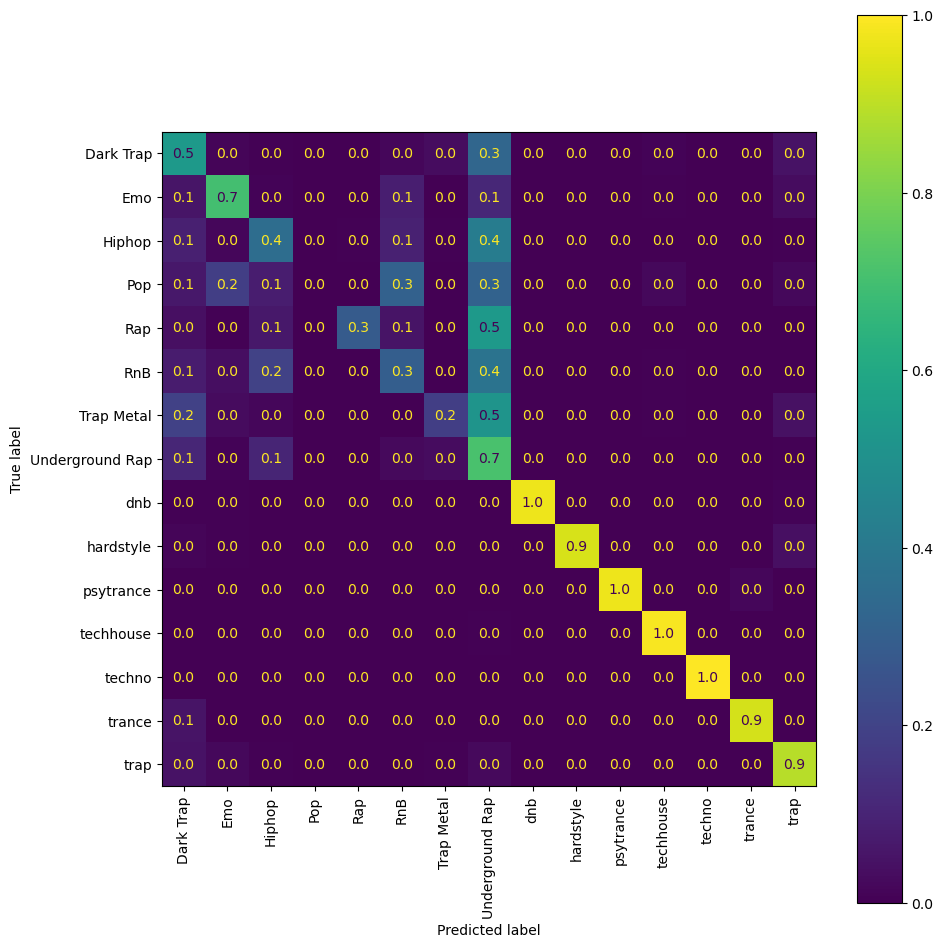

In [57]:
fig_cm, sub_cm = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(
    rfc_pipe,
    X_test[used_columns],
    y_test,
    display_labels=le.classes_,
    ax=sub_cm,
    normalize="true",
    values_format=".1f",
    xticks_rotation=90,
)
fig_cm.tight_layout()